# Airline Customer Satifaction

An airline company wants to perdict whether a customer is left satisfied with thier flight or not.

Airline satisfaction is important for several reasons:

- Customer Retention: Satisfied customers are more likely to continue using the services of an airline, leading to repeat business and customer loyalty.

- Reputation Management: Positive experiences lead to favorable word-of-mouth recommendations and reviews, which can enhance the airline's reputation and attract new customers.

- Competitive Advantage: In an industry as competitive as the airline industry, customer satisfaction can serve as a differentiator. Airlines that consistently deliver satisfactory experiences may gain a competitive edge over their rivals.

- Revenue Generation: Satisfied customers are more likely to spend money on additional services or upgrades, such as seat upgrades, in-flight meals, or priority boarding, contributing to the airline's revenue.

- Cost Reduction: High levels of customer satisfaction can reduce costs associated with customer complaints, refunds, and compensations for poor service experiences.

- Regulatory Compliance: Many aviation authorities require airlines to meet certain standards of customer service and satisfaction as part of their regulatory obligations.

Overall, ensuring customer satisfaction is crucial for the long-term success and sustainability of an airline business.


### Approch: A Deep Learning approch is used in the notebook, the model is built using ANN. 

In [1]:
# Importing the required dependencies
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing the required libraries for the 3rd problem 
from sklearn import datasets
import tensorflow as tf 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout 
from keras.layers import BatchNormalization 
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import keras_tuner as kt

### Importing the dataset and doing preprocessing.

In [2]:
dataset = pd.read_csv('train.csv')


### About the columns in the dataframe.

1. Unnamed:0 - Serial Number.
2. id - Unique customer.
3. Gender - Gender of the customer, classified as male and female.
4. Customer Type - Classifies the customer in loyal and disloyal customer. 
5. Age - age of the customer.
6. Type of Travel - Gives purpose of travel of the customer.
7. Class - Type of flight seats.
8. Inflight wifi serivce - Rating  for inflight wifi services.
9. Departure/Arrival time convenient - Rading given for Arrival and Departure timming. 
10. Ease of Online booking - Rating  for online booking. 
11. Gate location - Rating  for the location of the gate, given as per as convienence of the passangers to reach the gate.
12. Food and drink - Rating  for the food and drinks of the flight. 
13. Online boarding - Rating  for online boarding process for the flight. 
14. Seat comfort - Rating for seat confort.
15. Inflight entertainment - Rating for whether the amnities like magzines, movies, drinks etc. were satifactory or not.
16. Leg room service - Rating given for leg room service at the airport.
17. Baggage handling - Rating for baggage handling.
18. Checkin service - Rating for checkin process.
19. Inflight service - Rating for inflight services includes flight attendents. 
20. Cleanliness - Rating for how clean the flight was.
21. Departure Delay in Minutes - Delay in Departure timmings.
22. Arrival Delay in Minutes - Quantifies how late the flight reached their destination. 
23. satisfaction (Target Variable) - Classifies the customers into two categories 'satisfied' or 'neutral or dissatisfied'.

In [3]:
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
dataset['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

we drop some redundent columns like unnamed and id

In [5]:
dataset.drop(columns=['Unnamed: 0', 'id'],inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Getting some statistical information about the data.

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


checking for null entries in the dataframe.

In [8]:
dataset.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

There are 310 null entries in the column 'Arrival Delay in Minutes'. This can be dropped as there is ample of data to train an ANN model.

we remove the rows with missing values 

In [9]:
dataset.dropna(inplace=True)

Getting shape, non-null count and data type for the dataset

In [10]:
# Label Endcoding the categorical columns 
for i in dataset.select_dtypes(include=object):
    encoder = LabelEncoder()
    dataset[i] = encoder.fit_transform(dataset[i])

In [11]:
dataset['satisfaction'].value_counts()

satisfaction
0    58697
1    44897
Name: count, dtype: int64

Getting the features and target varibale. 

In [12]:
# Features. 
X = dataset.drop(columns=['satisfaction'])

# Target Variable.
y = dataset['satisfaction']

Splitting the data into testing and training data.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [14]:
# function to scale the training and testing features. 

def standardize(X_train,X_test):

    scalar = StandardScaler()

    X_train_scaled = scalar.fit_transform(X_train)
    X_test_scaled = scalar.fit_transform(X_test)

    return X_train_scaled,X_test_scaled

In [15]:
X_train_scaled,X_test_scaled = standardize(X_train,X_test)

# Model Building 

To build the ANN Model it is often recommended to experiment and check the accuracy of the model. What if there can be a process by which we can get a basic model as a starting point?

We can use 'KerasTuner' as external package (for keras) desined for hyperparmeter tuning an ANN model to get a basic ANN model. 

About KerasTuner from the package website.

KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves the pain points of hyperparameter search. Easily configure your search space with a define-by-run syntax, then leverage one of the available search algorithms to find the best hyperparameter values for your models. KerasTuner comes with Bayesian Optimization, Hyperband, and Random Search algorithms built-in, and is also designed to be easy for researchers to extend in order to experiment with new search algorithms.

Now we make a function to get the basic architecture for the network

In [16]:
# Function for hyperparemeter search in keras_tuner 

def build_model(hp):

    # Using the sequential function
    model = Sequential()

    # For counter 0 the loop adds the input layer for counter >0 the loop adds hidden layers  
    counter = 0

    for i in range(hp.Int('num_layers',min_value = 1,max_value = 5)):

        if counter == 0:
            
            # Input Layer
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value = 8,max_value = 216,step = 8),
                    activation= hp.Choice('activation'+ str(i),values = ['relu','tanh','sigmoid','swish']),
                    input_dim = 22
                    )
                )
            # Adding a batch normalization layer
            model.add(BatchNormalization())

        else:

            # Output Layer
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value = 8,max_value = 128,step = 8),
                    activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid','swish'])
                    )
                )
            # Adding a batch normalization layer  
            model.add(BatchNormalization())
            
        counter +=1

    # Outplut layer 
    model.add(Dense(1,activation = 'sigmoid'))

    # Compliling the model
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy']
                  )

    # Returning the model
    return model


In [17]:
# Creating a random search object, setting the maximimum number of trails to 10.
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=10,directory = 'mydir6')

In [18]:
# Searching for the best model.
tuner.search(X_train_scaled,y_train,epochs = 5,validation_data = (X_test_scaled,y_test),batch_size=32,shuffle = True)

Trial 10 Complete [00h 00m 43s]
val_accuracy: 0.9574310779571533

Best val_accuracy So Far: 0.9577528238296509
Total elapsed time: 00h 06m 50s


In [19]:
# Getting the best model
model1 = tuner.get_best_models(num_models=1)[0]

In [20]:
# Getting the architecture of the best model except the output layer.
tuner.results_summary(num_trials=1)

Results summary
Results in mydir6\untitled_project
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
num_layers: 4
units0: 152
activation0: swish
units1: 104
activation1: sigmoid
units2: 72
activation2: relu
units3: 128
activation3: sigmoid
Score: 0.9577528238296509


In [21]:
# Getting the model summary. 
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 152)               3496      
                                                                 
 batch_normalization (Batch  (None, 152)               608       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 104)               15912     
                                                                 
 batch_normalization_1 (Bat  (None, 104)               416       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 72)                7560      
                                                                 
 batch_normalization_2 (Bat  (None, 72)                2

In [22]:
# Training the model after the intial 5 epochs in keras tuner
history1 = model1.fit(X_train_scaled,y_train,batch_size=32,epochs=20,initial_epoch=5,validation_data=(X_test_scaled,y_test),shuffle=True)

Epoch 6/20
2267/2267 [==============================] - 11s 4ms/step - loss: 0.1115 - accuracy: 0.9546 - val_loss: 0.1015 - val_accuracy: 0.9569
Epoch 7/20
2267/2267 [==============================] - 8s 3ms/step - loss: 0.1082 - accuracy: 0.9561 - val_loss: 0.0970 - val_accuracy: 0.9579
Epoch 8/20
2267/2267 [==============================] - 8s 3ms/step - loss: 0.1051 - accuracy: 0.9567 - val_loss: 0.0943 - val_accuracy: 0.9597
Epoch 9/20
2267/2267 [==============================] - 8s 4ms/step - loss: 0.1005 - accuracy: 0.9585 - val_loss: 0.0937 - val_accuracy: 0.9593
Epoch 10/20
2267/2267 [==============================] - 8s 4ms/step - loss: 0.0996 - accuracy: 0.9582 - val_loss: 0.0934 - val_accuracy: 0.9606
Epoch 11/20
2267/2267 [==============================] - 8s 4ms/step - loss: 0.0968 - accuracy: 0.9597 - val_loss: 0.0916 - val_accuracy: 0.9606
Epoch 12/20
2267/2267 [==============================] - 8s 4ms/step - loss: 0.0949 - accuracy: 0.9594 - val_loss: 0.0912 - val_accur

In [23]:
# Function to plot the accurary and loss graphs.
def ann_acc_loss_plts(history):
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.tight_layout()
    plt.show()

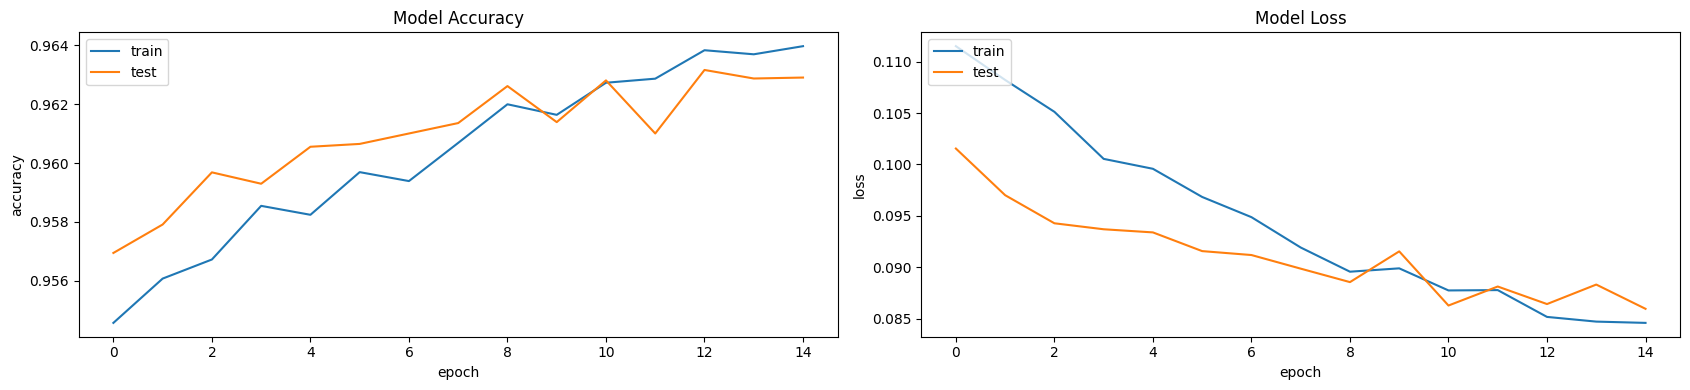

In [24]:
# Visulizing the loss and val accuracy 
ann_acc_loss_plts(history1)

In [25]:
# Predicting the customer satifaction 
y_pred = model1.predict(X_test_scaled)

# COnverting the probabilities given by sigmoid function into interger values
y_pred = np.array(y_pred > 0.5).astype(np.int64)

972/972 [==============================] - 2s 2ms/step


Performance Metrics.

In [26]:
# Accurary Score 
print('Accuracy Score:\n',accuracy_score(y_test,y_pred),'\n')

# Classification Report
print('Classification Report:\n',classification_report(y_test,y_pred),'\n')

Accuracy Score:
 0.9629009942404839 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     17643
           1       0.97      0.94      0.96     13436

    accuracy                           0.96     31079
   macro avg       0.96      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079
 



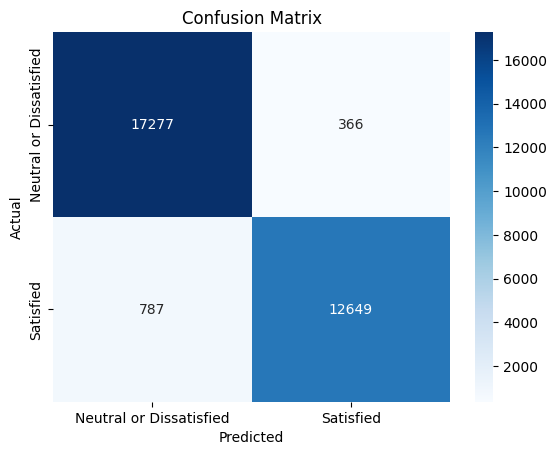

In [27]:
# Confusion Matrix
# Plotting the confusion matrix 
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True, fmt='',cmap="Blues",
            xticklabels=['Neutral or Dissatisfied','Satisfied'],
            yticklabels=['Neutral or Dissatisfied','Satisfied']
            )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This Method can a lot in automating the model Aartificial Neural Network model building process. 

Now a model we compare this with a model built by experimenting.

In [28]:
# Creating a Sequential model
model2 = Sequential()

# Input Layer
model2.add(Dense(128, name= 'First_Hidden_layer', input_dim=22, activation="swish"))
model2.add(BatchNormalization())

# Hidden Layers
model2.add(Dense(64, name= 'Second_Hidden_layer', activation="swish"))
model2.add(BatchNormalization())

model2.add(Dense(64, name= 'Third_Hidden_layer', activation="swish"))
model2.add(BatchNormalization())

model2.add(Dense(32, name= 'Forth_Hidden_layer', activation="swish") )
model2.add(BatchNormalization())

# Output Layer
model2.add(Dense(1,name = 'Output_Layer',activation = 'sigmoid'))

# Compliing the model
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Getting the Summanry for the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_layer (Dense)  (None, 128)               2944      
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 Second_Hidden_layer (Dense  (None, 64)                8256      
 )                                                               
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 Third_Hidden_layer (Dense)  (None, 64)                4160      
                                                      

In [29]:
# Tranning the Model
history2 = model2.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=20,batch_size=32,shuffle=True)

Epoch 1/20
2267/2267 [==============================] - 11s 4ms/step - loss: 0.1915 - accuracy: 0.9226 - val_loss: 0.1308 - val_accuracy: 0.9435
Epoch 2/20
2267/2267 [==============================] - 9s 4ms/step - loss: 0.1477 - accuracy: 0.9398 - val_loss: 0.1167 - val_accuracy: 0.9520
Epoch 3/20
2267/2267 [==============================] - 8s 4ms/step - loss: 0.1316 - accuracy: 0.9464 - val_loss: 0.1037 - val_accuracy: 0.9560
Epoch 4/20
2267/2267 [==============================] - 8s 4ms/step - loss: 0.1190 - accuracy: 0.9509 - val_loss: 0.1021 - val_accuracy: 0.9570
Epoch 5/20
2267/2267 [==============================] - 8s 4ms/step - loss: 0.1143 - accuracy: 0.9526 - val_loss: 0.1022 - val_accuracy: 0.9572
Epoch 6/20
2267/2267 [==============================] - 8s 4ms/step - loss: 0.1088 - accuracy: 0.9554 - val_loss: 0.0969 - val_accuracy: 0.9594
Epoch 7/20
2267/2267 [==============================] - 8s 4ms/step - loss: 0.1084 - accuracy: 0.9559 - val_loss: 0.0977 - val_accuracy

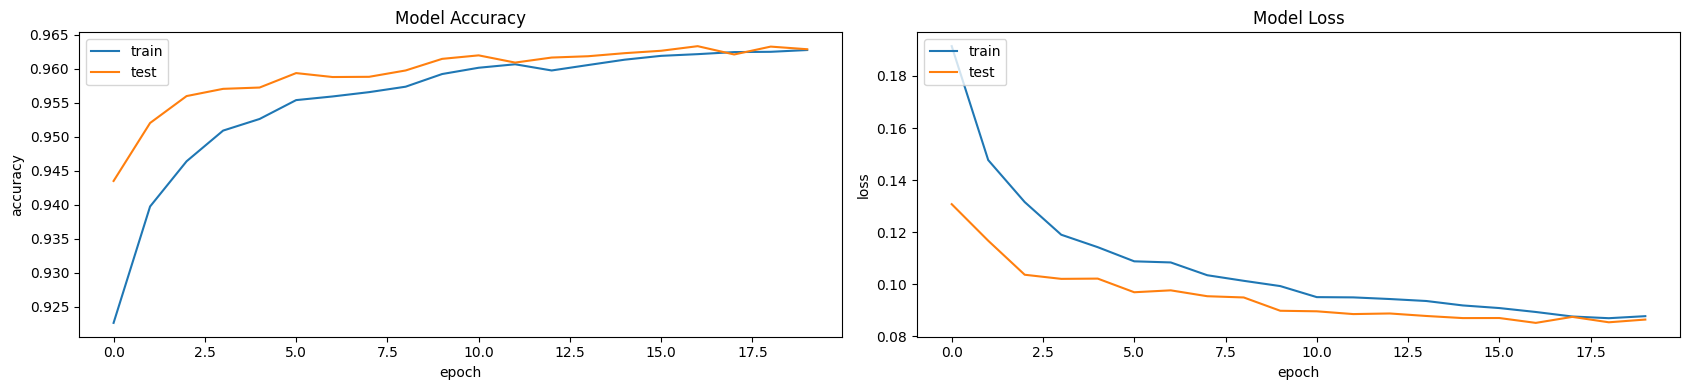

In [30]:
# Visulizing the loss and val accuracy 
ann_acc_loss_plts(history2)

In [31]:
# Predicting the customer satifaction 
y_pred = model2.predict(X_test_scaled)

# COnverting the probabilities given by sigmoid function into interger values
y_pred = np.array(y_pred > 0.5).astype(np.int64)

972/972 [==============================] - 2s 2ms/step


Performance Metrics.

In [32]:
# Accurary Score 
print('Accuracy Score:\n',accuracy_score(y_test,y_pred),'\n')

# Classification Report
print('Classification Report:\n',classification_report(y_test,y_pred),'\n')

Accuracy Score:
 0.9628688181730429 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     17643
           1       0.97      0.94      0.96     13436

    accuracy                           0.96     31079
   macro avg       0.96      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079
 



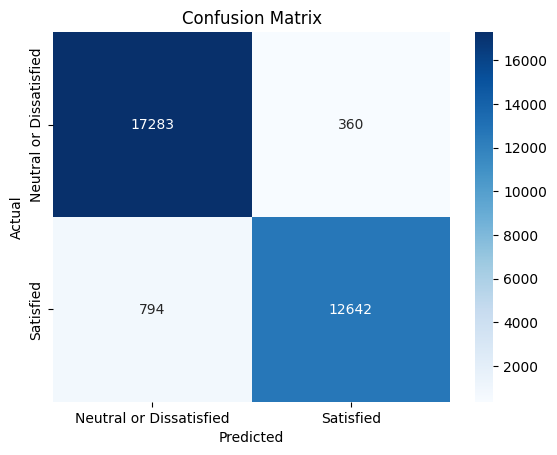

In [33]:
# Plotting the confusion matrix 
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True, fmt='',cmap="Blues",
            xticklabels=['Neutral or Dissatisfied','Satisfied'],
            yticklabels=['Neutral or Dissatisfied','Satisfied']
            )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

It is obsereved that building ANN model using the KerasTuner gave similar results as compared to an experimental model. Using the KerasTuner may benifit the developer by providing a base model to experiment with or can provide with a model which gives a high accuracy with the very first try.